In [1]:
!pip install opencv-python

DEPRECATION: Loading egg at d:\anaconda3\lib\site-packages\huggingface_hub-0.27.0rc0-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [3]:
!pip install tensorflow

  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached ml_dtypes-0.5.1-cp311-cp311-win_amd64.whl.metadata (22 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
  Using cached namex-0.0.9-py3-none-any.whl.metadata (322 bytes)
  Using cached optree-0.15.0-cp311-cp311-win_amd64.whl.metadata (49 kB)
  Using ca

In [1]:
import os 
import sys 

os.getcwd()

'd:\\Burmese-OCR\\src'

In [5]:
os.chdir(r"D:\Burmese-OCR\data\numbers\numbers(KK)")

In [4]:
os.getcwd()

'D:\\Burmese-OCR\\data\\numbers\\numbers(KK)'

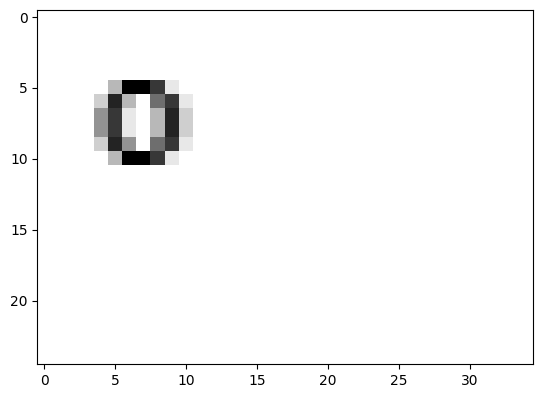

In [37]:
import cv2 
import matplotlib.pyplot as plt 

read_img = cv2.imread(os.getcwd() + r"\1040\1040\0.png")
#print(read_img)
plt.imshow(read_img)

In [28]:
os.listdir(r"D:\Burmese-OCR\data\numbers\numbers(KK)")

['1040',
 '1041',
 '1042',
 '1043',
 '1044',
 '1045',
 '1046',
 '1047',
 '1048',
 '1049']

In [71]:
import shutil


In [77]:
for i in os.listdir(os.getcwd()):
    destination_path = os.path.join(os.getcwd(), i)
    #print(destination_path)
    if os.path.isdir(destination_path):
        result = os.path.join(destination_path, i)
        print(result)
        for file in os.listdir(result):
            source_file = os.path.join(result, file)
            target_file = os.path.join(destination_path, file)            
            print(f"  Moving: {source_file} → {target_file}")
            shutil.move(source_file, target_file)

D:\Burmese-OCR\data\numbers\numbers(KK)\1040\1040
  Moving: D:\Burmese-OCR\data\numbers\numbers(KK)\1040\1040\0.png → D:\Burmese-OCR\data\numbers\numbers(KK)\1040\0.png
  Moving: D:\Burmese-OCR\data\numbers\numbers(KK)\1040\1040\01_10_b.png → D:\Burmese-OCR\data\numbers\numbers(KK)\1040\01_10_b.png
  Moving: D:\Burmese-OCR\data\numbers\numbers(KK)\1040\1040\01_10_i.png → D:\Burmese-OCR\data\numbers\numbers(KK)\1040\01_10_i.png
  Moving: D:\Burmese-OCR\data\numbers\numbers(KK)\1040\1040\01_10_n.png → D:\Burmese-OCR\data\numbers\numbers(KK)\1040\01_10_n.png
  Moving: D:\Burmese-OCR\data\numbers\numbers(KK)\1040\1040\01_10_u.png → D:\Burmese-OCR\data\numbers\numbers(KK)\1040\01_10_u.png
  Moving: D:\Burmese-OCR\data\numbers\numbers(KK)\1040\1040\01_14_b.png → D:\Burmese-OCR\data\numbers\numbers(KK)\1040\01_14_b.png
  Moving: D:\Burmese-OCR\data\numbers\numbers(KK)\1040\1040\01_14_i.png → D:\Burmese-OCR\data\numbers\numbers(KK)\1040\01_14_i.png
  Moving: D:\Burmese-OCR\data\numbers\numbers

In [15]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

classes = ["1040", "1041","1042","1043","1044","1045","1046","1047","1048",'1049']
image_dir = os.getcwd()

data = []
labels = []
for class_ in classes:
  path = os.path.join(image_dir, class_)
  print(class_)
  for image in os.listdir(path):
    image_path = os.path.join(path, image)
    image_ = load_img(image_path, target_size=(224, 224))
    image_ = img_to_array(image_)
    image_ = preprocess_input(image_)

    data.append(image_)
    labels.append(class_)

1040
1041
1042
1043
1044
1045
1046
1047
1048
1049


In [16]:
from sklearn.preprocessing import LabelBinarizer
import numpy as np

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

print(labels.shape)

(1982, 10)


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(data,labels,test_size=0.2,stratify=labels,random_state=42)
print(x_train.shape)
print(x_test.shape)

(1585, 224, 224, 3)
(397, 224, 224, 3)


In [18]:
import tensorflow as tf
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [19]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224,224,3))
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [20]:
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten, Activation, GlobalAveragePooling2D,Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential

x = base_model.output
x =  Dropout(0.5)(x)
x = Flatten()(x)
x = BatchNormalization()(x)
x = Dense(1024,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x =  Dropout(0.5)(x)
x = Dense(1024,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x =  Dropout(0.5)(x)
x = Dense(1024,kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x =  Dropout(0.5)(x)

predictions = Dense(10, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
test_features=model_feat.predict(x_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step


In [21]:
x_train_acc, x_val_acc, y_train_acc, y_val_acc = train_test_split(train_features,y_train,
                                                  test_size = 0.2,
                                                  stratify = y_train,
                                                  shuffle = True,
                                                  random_state = 42)

In [22]:
X_test,y_test=test_features,y_test

print('length X_train:', len(x_train_acc))
print('length y_train:', len(y_train_acc))

print('length X_val:',  len(x_val_acc))
print('length y_val:', len(y_val_acc))

print('length X_test:',  len(X_test))
print('length y_test:', len(y_test))

length X_train: 1268
length y_train: 1268
length X_val: 317
length y_val: 317
length X_test: 397
length y_test: 397


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)

    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),4)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),4)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),4)
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("accuracy : {}%".format(train_accuracy))
    print("F1_score : {}".format(train_F1))
    print("Recall : {}".format(train_recall))
    print("Precision : {}".format(train_precision))
    
    print()
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("accuracy : {}%".format(val_accuracy))
    print("F1_score : {}".format(val_F1))
    print("Recall : {}".format(val_recall))
    print("Precision : {}".format(val_precision))
    
    print()
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("accuracy : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Recall : {}".format(test_recall))
    print("Precision : {}".format(test_precision))

    print("-"*80)
    print()

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 

names = [
        "K Nearest Neighbour Classifier",
        "Random Forest Classifier",
        "AdaBoost Classifier", 
         ]
classifiers = [
    KNeighborsClassifier(),
    RandomForestClassifier(),
        ]

zipped_clf = zip(names,classifiers)
zipped_clf

In [38]:
from sklearn.pipeline import Pipeline
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('classifier', c)
        ])
        print("Fitting {} on features ".format(n))
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [39]:
classifier_comparator(x_train_acc,y_train_acc,x_val_acc,y_val_acc,X_test,y_test,classifier=zipped_clf)

Fitting K Nearest Neighbour Classifier on features 


d:\anaconda3\envs\langchain\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



------------------------ Train Set Metrics------------------------

accuracy : 18.22%
F1_score : 0.2788
Recall : 0.1822
Precision : 0.748

------------------------ Validation Set Metrics------------------------

accuracy : 8.52%
F1_score : 0.129
Recall : 0.0852
Precision : 0.3233

------------------------ Test Set Metrics------------------------

accuracy : 10.33%
F1_score : 0.1538
Recall : 0.1033
Precision : 0.3853
--------------------------------------------------------------------------------

Fitting Random Forest Classifier on features 

------------------------ Train Set Metrics------------------------

accuracy : 100.0%
F1_score : 1.0
Recall : 1.0
Precision : 1.0

------------------------ Validation Set Metrics------------------------

accuracy : 4.1000000000000005%
F1_score : 0.0745
Recall : 0.041
Precision : 0.5626

------------------------ Test Set Metrics------------------------

accuracy : 4.03%
F1_score : 0.0717
Recall : 0.0403
Precision : 0.5901
-------------------------

d:\anaconda3\envs\langchain\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\envs\langchain\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
